# Vessel boost toolbox

## 1. Initinal training

If you are working outside of a container, you can store you data under *data* folder as the instruction below. If you are working inside a container, you can mount your data folder to *./data/train/* and  *./data/label/*.

Please make sure that the name of a segmentation image file should contain the FULL NAME of its corresponding MRI image. 
e.g.:

**Raw image:** TOF_3895.nii.gz

**Segmentation image:** seg_TOF_3895.nii.gz or TOF_3895_seg.nii.gz, just make sure it contains the "TOF_3895".

In [2]:
# Set the necessary parameters
# If you set prep_mode to 4, which means no preprocessing will happen, then you don't have to set a path to store the preprocessed images
!python ./../train.py --ds_path ./../../data/img/ --lb_path ./../../data/seg/ --prep_mode 4 --ep 10 --lr 1e-3 --outmo ./../saved_models/test_model

Training session will start shortly..
Aborting the preprocessing procedure!

All images have been loaded, the training process will start soon!
Epoch: [1/10], Loss:  0.9895, Current learning rate:  0.00100000                
Epoch: [2/10], Loss:  0.9787, Current learning rate:  0.00100000                
Epoch: [3/10], Loss:  0.9690, Current learning rate:  0.00100000                
Epoch: [4/10], Loss:  0.9739, Current learning rate:  0.00100000                
Epoch: [5/10], Loss:  0.9615, Current learning rate:  0.00100000                
Epoch: [6/10], Loss:  0.9565, Current learning rate:  0.00100000                
Epoch: [7/10], Loss:  0.9710, Current learning rate:  0.00100000                
Epoch: [8/10], Loss:  0.9659, Current learning rate:  0.00100000                
Epoch: [9/10], Loss:  0.9742, Current learning rate:  0.00095000                
Epoch: [10/10], Loss:  0.9738, Current learning rate:  0.00095000               
100%|█████████████████████████████████████████

In [3]:
# If you set prep_mode to 1,2 or 3, which means both/one of denosing and N4 bias field correction will happen, then you have to set a path to store the preprocessed images
!python ./../train.py --ds_path ./../../data/img/ --lb_path ./../../data/seg/ --prep_mode 1 --ps_path ./../../data/preprocessed/ --ep 10 --lr 1e-3 --outmo ./../saved_models/test_model

Training session will start shortly..
The preprocessing procedure is starting!

100%|████████████████████████████████████████████| 1/1 [03:15<00:00, 195.59s/it]
All processed images are successfully saved!
All images have been loaded, the training process will start soon!
Epoch: [1/10], Loss:  0.9847, Current learning rate:  0.00100000                
Epoch: [2/10], Loss:  0.9725, Current learning rate:  0.00100000                
Epoch: [3/10], Loss:  0.9654, Current learning rate:  0.00100000                
Epoch: [4/10], Loss:  0.9734, Current learning rate:  0.00100000                
Epoch: [5/10], Loss:  0.9728, Current learning rate:  0.00100000                
Epoch: [6/10], Loss:  0.9516, Current learning rate:  0.00100000                
Epoch: [7/10], Loss:  0.9679, Current learning rate:  0.00100000                
Epoch: [8/10], Loss:  0.9894, Current learning rate:  0.00100000                
Epoch: [9/10], Loss:  0.9747, Current learning rate:  0.00095000               

## 2. Inference

### Pre-trained models promptly available on OSF

We are currently provide 3 pre-trained models, you can download them to make infetence on your images by running the following cell:

When doing in on Terminal, you could run the following code to create a path to save our provided pre-trained models. While in this tutorial notebook, we used _Python os library_ to change work directory.
```bash
mkdir ./../saved_models
cd ./../saved_models/

# Each line of code below corresponds to a pre-trained model
osf -p abk4p fetch /pretrained_models/manual_ep5000_0621
osf -p abk4p fetch /pretrained_models/om1_ep5000_0711
osf -p abk4p fetch /pretrained_models/om2_ep5000_0711
```

In [1]:
import os
os.chdir('./../saved_models/')

!osf -p abk4p fetch /pretrained_models/manual_ep5000_0621
# !osf -p abk4p fetch /pretrained_models/om1_ep5000_0711
# !osf -p abk4p fetch /pretrained_models/om2_ep5000_0711

100%|██████████████████████████████████| 26.4M/26.4M [00:00<00:00, 98.8Mbytes/s]


This is a stand-alone module to produce segmentation of input images by using a pre-trained model.

In [2]:
# Set the necessary parameters
# If you set prep_mode to 4, which means no preprocessing will happen, then you don't have to set a path to store the preprocessed images
!python ./../inference.py --ds_path ./../../data/img_skull/ --out_path ./../../data/predicted_label/ --pretrained ./../saved_models/manual_ep5000_0621 --prep_mode 4

./../../data/predicted_label/ does not exist.
./../../data/predicted_label/ has been created!
Inference session will start shortly..
Aborting the preprocessing procedure!

Running with GPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [01:16<00:00, 12.71s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii is successfully saved!

Output MIP image GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii is successfully saved!

Prediction and thresholding procedure end!



Vessel Boost will generate both .nii segmentation file and its maximum intensity projection (.jpg). View the maximum intensity projection of the generated segmentation:

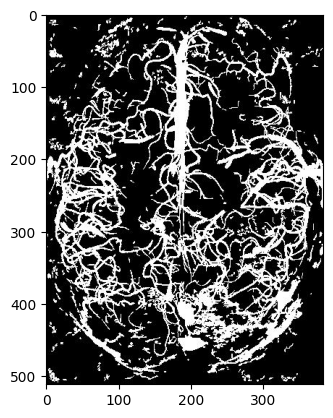

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as img

mip_image = img.imread("./../../data/predicted_label/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.jpg")
plt.imshow(mip_image, cmap='gray')

In [4]:
# If you set prep_mode to 1,2 or 3, which means both/one of denosing and N4 bias field correction will happen, then you have to set a path to store the preprocessed images
!python ./../inference.py --ds_path ./../../data/img_skull/ --ps_path ./../../data/preprocessed/ --out_path ./../../data/predicted_label_2/ --pretrained ./../saved_models/manual_ep5000_0621 --prep_mode 1 

./../../data/predicted_label_2/ does not exist.
./../../data/predicted_label_2/ has been created!
Inference session will start shortly..
The preprocessing procedure is starting!

100%|████████████████████████████████████████████| 1/1 [03:23<00:00, 203.66s/it]
All processed images are successfully saved!
Running with GPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [01:09<00:00, 11.54s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii is successfully saved!

Output MIP image GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii is successfully saved!

Prediction and thresholding procedure end!



MIP image:

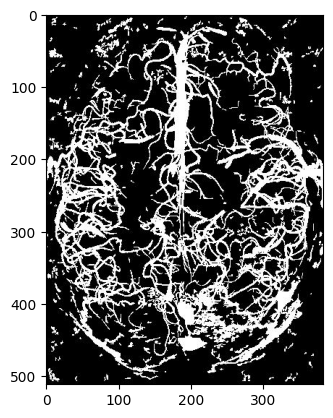

In [6]:
mip_image = img.imread("./../../data/predicted_label_2/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.jpg")
plt.imshow(mip_image, cmap='gray')

## 3. Test-time adaptation 

Test-time adaptation module for further optimization of a pre-trained model. 


### TTA without a proxy
You could apply this module directly on your on data without providing the proxy segmentation. This module will automatically generate proxies and finetune the model. If you set prep_mode to 4, which means no preprocessing will happen, then you don't have to set a path to store the preprocessed images. Note that the input path must only contain the nifti images for processing and be different to the output path.

In [7]:
!python ./../test_time_adaptation.py --ds_path ./../../data/img_skull/ --out_path ./../../data/tta_predicted_label/ --pretrained ./../saved_models/manual_ep5000_0621 --prep_mode 4 --ep 100 --lr 1e-3 

./../../data/tta_predicted_label/ does not exist.
./../../data/tta_predicted_label/ has been created!
./../../data/tta_predicted_label/proxies/ does not exist.
./../../data/tta_predicted_label/proxies/ has been created!
./../../data/tta_predicted_label/finetuned/ does not exist.
./../../data/tta_predicted_label/finetuned/ has been created!
TTA session will start shortly..
Aborting the preprocessing procedure!

No proxies are provided, strating generating proxies...
Running with GPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [01:11<00:00, 11.84s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii is successfully saved!

Prediction and thresholding procedure end!

Proxies are provided!
Running with GPU
The chosen model is: ./../saved_models/manual_ep5000_0621
Finetuning procedure starts!
Epoch: [1/100], Loss:  0.3694, Current learning rate:  0.0010

View the MIP image:

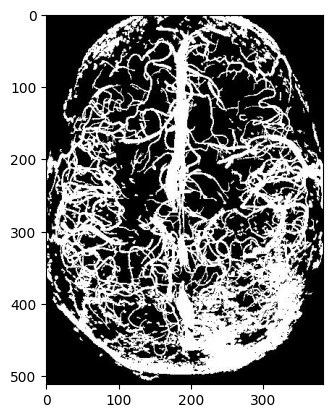

In [8]:
mip_image = img.imread("./../../data/tta_predicted_label/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.jpg")
plt.imshow(mip_image, cmap='gray')

Similar to the previous two modules (train.py and inference.py), if you set prep_mode to 1,2 or 3, which means both(1), denosing(2) or N4 bias field correction(3) will be applied to the input images, and you have to set a path to store the preprocessed images:

In [9]:
!python ./../test_time_adaptation.py --ds_path ./../../data/img_skull/ --ps_path ./../../data/preprocessed/ --out_path ./../../data/tta_predicted_label_2/ --pretrained ./../saved_models/manual_ep5000_0621 --prep_mode 1 --ep 100 --lr 1e-3 

./../../data/tta_predicted_label_2/ does not exist.
./../../data/tta_predicted_label_2/ has been created!
./../../data/tta_predicted_label_2/proxies/ does not exist.
./../../data/tta_predicted_label_2/proxies/ has been created!
./../../data/tta_predicted_label_2/finetuned/ does not exist.
./../../data/tta_predicted_label_2/finetuned/ has been created!
TTA session will start shortly..
The preprocessing procedure is starting!

100%|████████████████████████████████████████████| 1/1 [03:21<00:00, 201.72s/it]
All processed images are successfully saved!
No proxies are provided, strating generating proxies...
Running with GPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [01:09<00:00, 11.56s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii is successfully saved!

Prediction and thresholding procedure end!

Proxies are provided!
Running with GPU
The cho

View the MIP image:

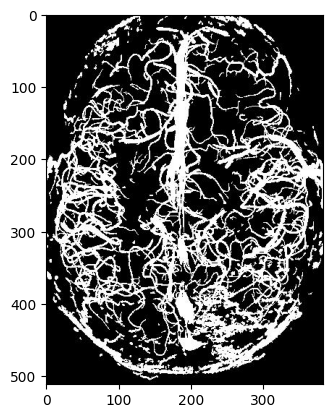

In [10]:
mip_image = img.imread("./../../data/tta_predicted_label_2/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.jpg")
plt.imshow(mip_image, cmap='gray')

### TTA with a specified proxy
You can provide a proxy segmentation which will be used for the test-time-adaption instead of the automatically generated proxies. This segmentation can be created using any methods, for example manual labelling or other, non-deep-learning methods. We will use the filenames to match the raw images and proxy segmentations. \
In the following example, we simply used the proxy segmentation generated by the previous section:


In [12]:
!python ./../test_time_adaptation.py --ds_path ./../../data/img_skull/ --px_path ./../../data/tta_predicted_label/proxies/ --out_path ./../../data/tta_predicted_label_3/ --pretrained ./../saved_models/manual_ep5000_0621 --prep_mode 4 --ep 100 --lr 1e-3 

./../../data/tta_predicted_label_3/ does not exist.
./../../data/tta_predicted_label_3/ has been created!
./../../data/tta_predicted_label_3/finetuned/ does not exist.
./../../data/tta_predicted_label_3/finetuned/ has been created!
TTA session will start shortly..
Aborting the preprocessing procedure!

Proxies are provided!
Running with GPU
The chosen model is: ./../saved_models/manual_ep5000_0621
Finetuning procedure starts!
Epoch: [1/100], Loss:  0.2217, Current learning rate:  0.00100000               
Epoch: [2/100], Loss:  0.3634, Current learning rate:  0.00100000               
Epoch: [3/100], Loss:  0.5775, Current learning rate:  0.00100000               
Epoch: [4/100], Loss:  0.5714, Current learning rate:  0.00100000               
Epoch: [5/100], Loss:  0.4311, Current learning rate:  0.00100000               
Epoch: [6/100], Loss:  0.4517, Current learning rate:  0.00100000               
Epoch: [7/100], Loss:  0.4078, Current learning rate:  0.00100000               
Epo

The mip of the generated segmentation:


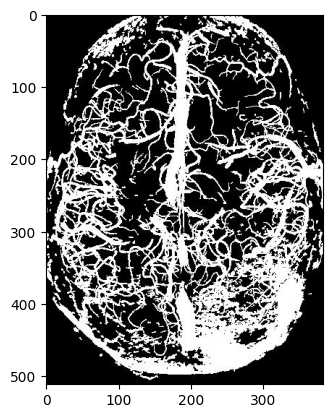

In [13]:
mip_image = img.imread("./../../data/tta_predicted_label_3/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.jpg")
plt.imshow(mip_image, cmap='gray')

Similarily, if you set prep_mode to 1,2 or 3, which means both(1), denosing(2) or N4 bias field correction(3) will be applied to the input images, and you have to set a path to store the preprocessed images:

In [14]:
!python ./../test_time_adaptation.py --ds_path ./../../data/img_skull/ --px_path ./../../data/tta_predicted_label_2/proxies/ --ps_path ./../../data/preprocessed/ --out_path ./../../data/tta_predicted_label_4/ --pretrained ./../saved_models/manual_ep5000_0621 --prep_mode 1 --ep 100 --lr 1e-3 

./../../data/tta_predicted_label_4/ does not exist.
./../../data/tta_predicted_label_4/ has been created!
./../../data/tta_predicted_label_4/finetuned/ does not exist.
./../../data/tta_predicted_label_4/finetuned/ has been created!
TTA session will start shortly..
The preprocessing procedure is starting!

100%|████████████████████████████████████████████| 1/1 [03:21<00:00, 201.06s/it]
All processed images are successfully saved!
Proxies are provided!
Running with GPU
The chosen model is: ./../saved_models/manual_ep5000_0621
Finetuning procedure starts!
Epoch: [1/100], Loss:  0.4229, Current learning rate:  0.00100000               
Epoch: [2/100], Loss:  0.8243, Current learning rate:  0.00100000               
Epoch: [3/100], Loss:  0.5074, Current learning rate:  0.00100000               
Epoch: [4/100], Loss:  0.3992, Current learning rate:  0.00100000               
Epoch: [5/100], Loss:  0.5225, Current learning rate:  0.00100000               
Epoch: [6/100], Loss:  0.3523, Curre

To view the MIP:

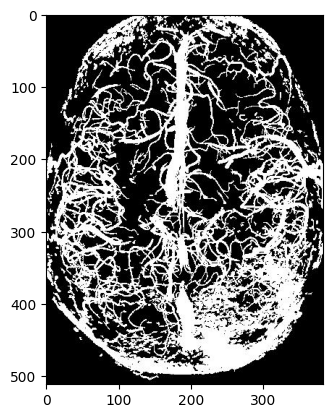

In [15]:
mip_image = img.imread("./../../data/tta_predicted_label_4/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.jpg")
plt.imshow(mip_image, cmap='gray')